# Final Project - Kaggle Competition
Author: Christopher DiMattia

## Introduction

The goal of this project is to compete in a Kaggle competition to compare the ML techniques I learned in this course to those of people who actively participate in ML competitions.

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in CSV and print to ensure it works
df = pd.read_csv("train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
#perform pre-processing on data to remove names, split cabin into seperate columns and split passenger ids

def preProcess_noID(df):
    df_split_cabin =df["Cabin"].str.split('/',expand=True)
    df_split_cabin = df_split_cabin.rename(columns={0: 'deck', 1: 'num', 2: 'side'})
    df = df.join(df_split_cabin)
    df =df.drop(["Cabin"],axis=1).drop(["PassengerId"],axis=1).drop(["Name"],axis=1)
    return df

In [4]:
df_processed = preProcess_noID(df)
df_processed

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [5]:
#check to see if there are nan values
for column in df_processed.columns:
    unique_values = df_processed[column ].unique()
    print(unique_values)

#looks like there are nan values in many of the columns.  Let's remove the nan values to see how many columns are left.

['Europa' 'Earth' 'Mars' nan]
[False True nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
[False True nan]
[   0.  109.   43. ... 1569. 8586.  745.]
[   0.    9. 3576. ... 3208. 6819. 4688.]
[   0.   25.  371. ... 1085.  510. 1872.]
[   0.  549. 6715. ... 2868. 1107. 1643.]
[   0.   44.   49. ... 1164.  971. 3235.]
[False  True]
['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['0' '1' '2' ... '1892' '1893' '1894']
['P' 'S' nan]


In [6]:
#let's check how many rows with nan values are dropped
df_droppedNaN= df_processed.dropna()
df_droppedNaN

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


### NaN Values

It appears that 25% of the data has nan values (1929/8693), so there are two options:
1. Remove rows with nan values
2. Replace the nan values with either the mean or the mode depending on it's data type

Removing nan values has the advantage of keeping the data clearn (no leakage between rows and may influence covariance between features) while it has the disadvantage of shrinking the dataset.  Replacing nan values with mean and mode values has the inverse effect (data leakage between rows and may affect covariance).  For this project I think it's worth using two datasets and comparing which gets the higher score


For this workbook let's train the models with the nan values replaced by either the mean for numerical data or the mode for categorical data and see if it makes a large difference.  In the other note book we will remove the nan values all together

In [7]:
#replace nan values with mean and mode
col_numeric = df_processed.select_dtypes(include=['number']).columns
col_text = df_processed.select_dtypes(include=['object']).columns

for column in col_numeric:
    df_processed[column] = df_processed[column].fillna(df_processed[column].mean())

for column in col_text:
    df_processed[column] = df_processed[column].fillna(df_processed[column].mode().iloc[0])
df_withNans = df_processed

In [8]:
#split the data into training and test sets
X_nans = df_withNans.drop('Transported', axis=1)
y_nans = pd.DataFrame(df_withNans["Transported"], columns=["Transported"])
X_nans.shape

(8693, 13)

In [9]:
#create functions for one hot encoding the X data and a label encoder for the y
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

def one_hot_encoding(df):
    columns = ['HomePlanet','CryoSleep','Destination','VIP','deck','side']
    enc = OneHotEncoder()
    encoded_columns = enc.fit_transform(df[columns])
    # Create a new dataframe with the encoded columns and merge it with the original dataframe
    encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=enc.get_feature_names_out (columns))
    df = df.drop(columns, axis=1)
    result = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1).reset_index(drop=True)
    return result

def label_encoder(df):
    le = preprocessing.LabelEncoder()
    y_enc = le.fit(df["Transported"]).transform(df["Transported"])
    return y_enc

In [10]:
#encode X and y for the two datasets
X_NansReplaced_encoded = one_hot_encoding(X_nans)
y_nansReplaced_labeled = label_encoder(y_nans)

In [11]:
#split the data
#create training/testing split between
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NansReplaced_encoded, y_nansReplaced_labeled, random_state=37, test_size=0.2)

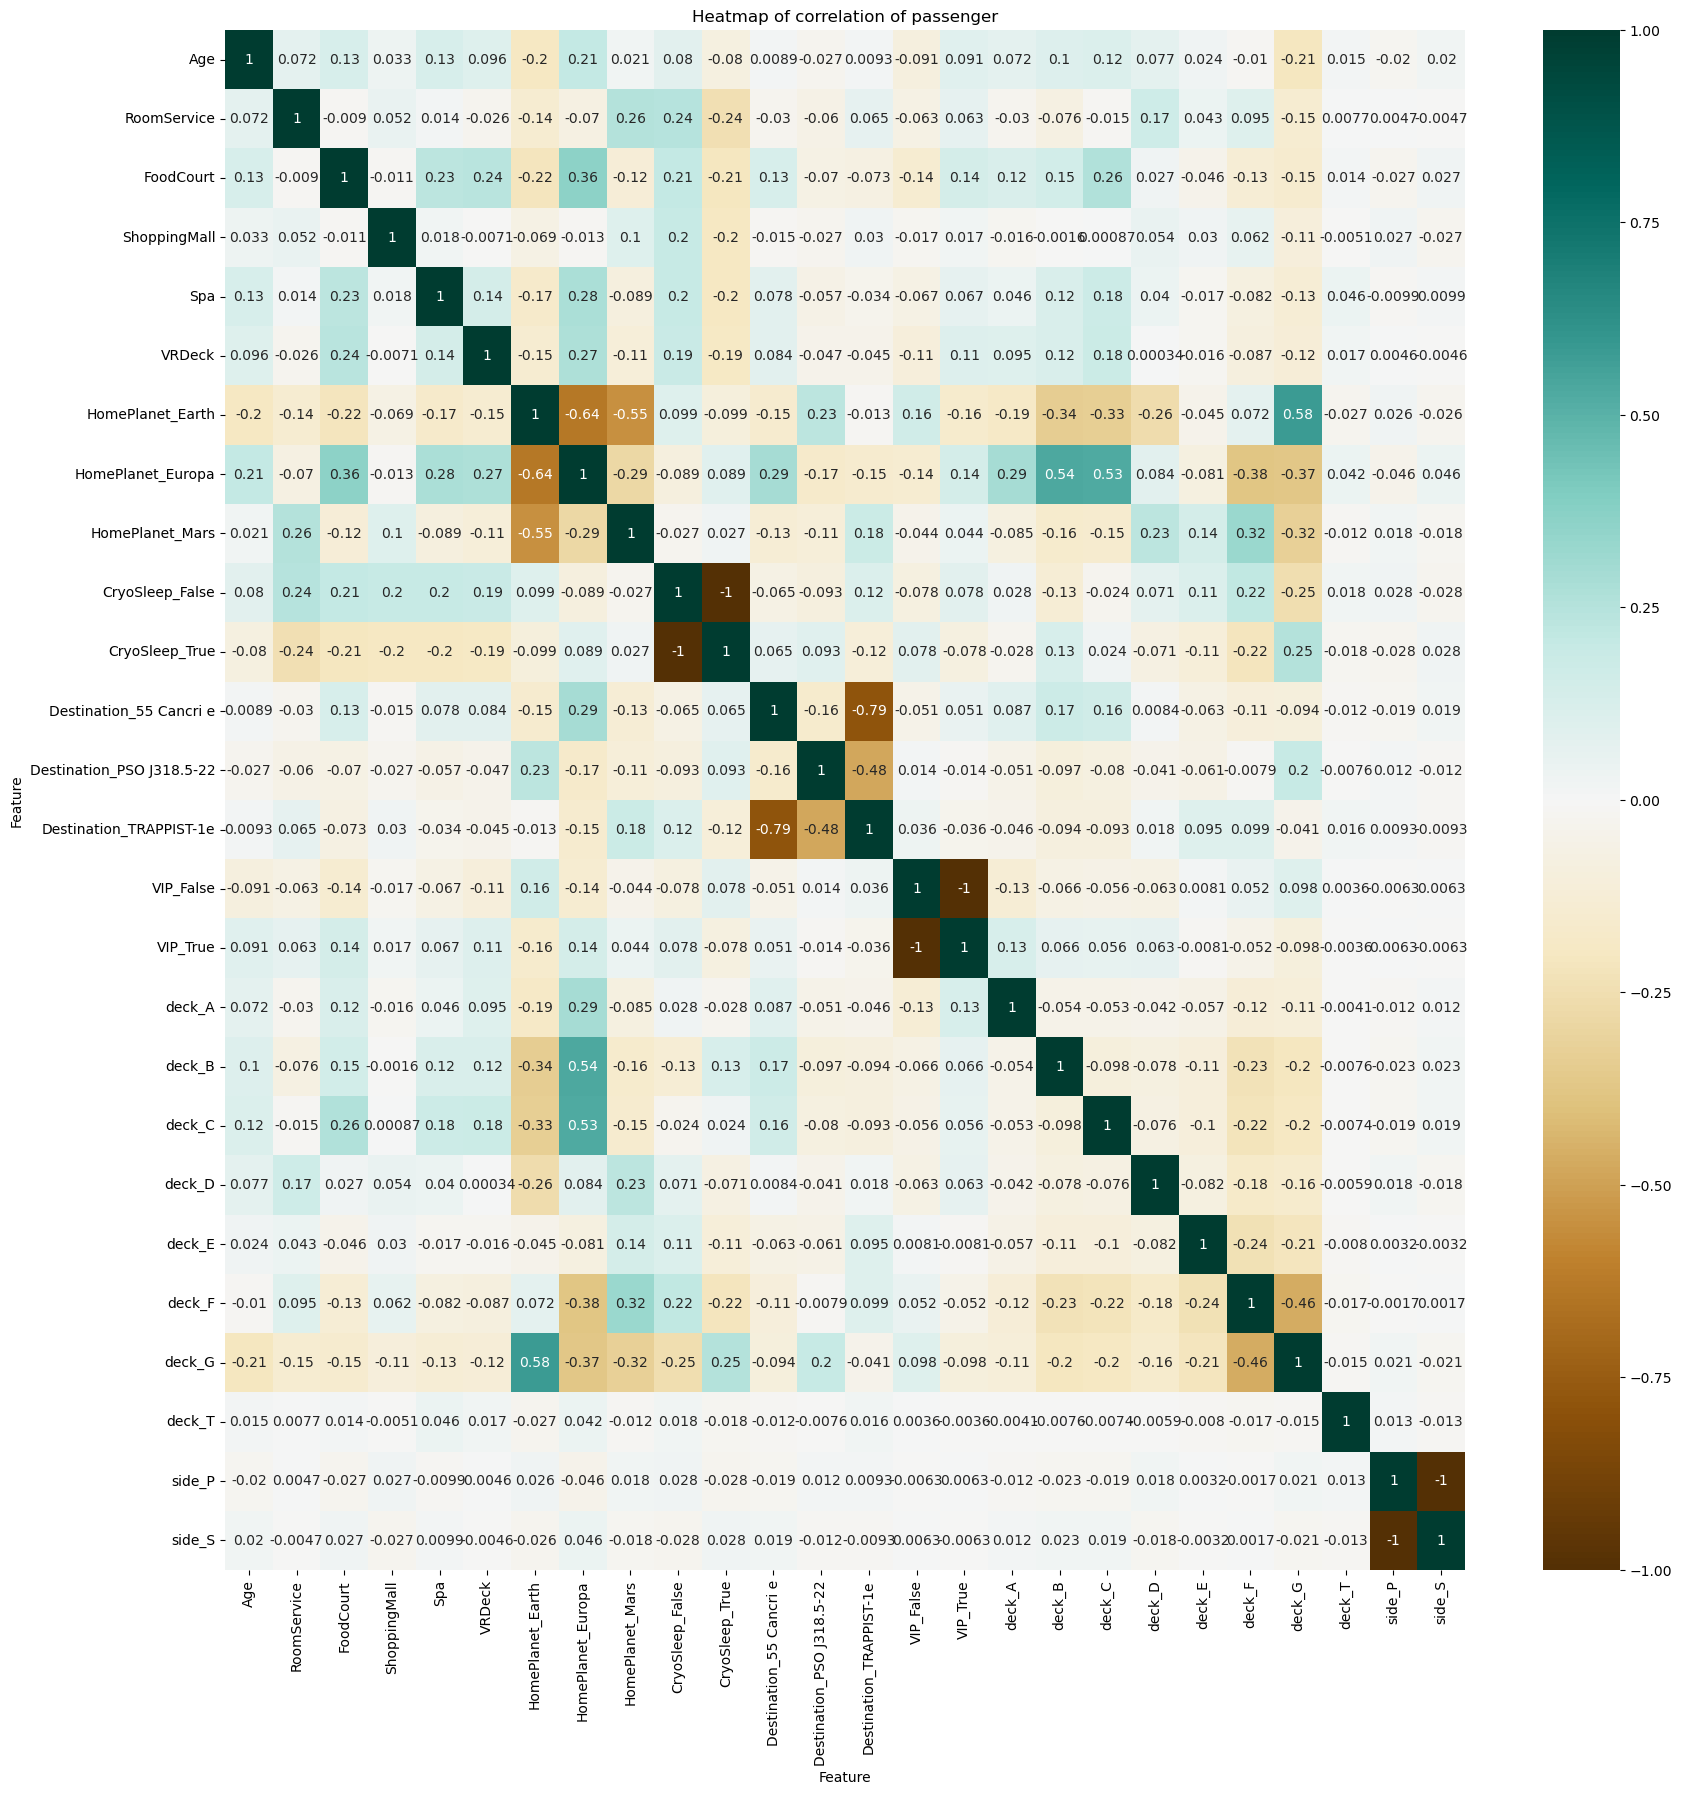

In [12]:
# let's print a heatmap of the correlation between the passenger features to see if there is major correlation.  If there is high correlation it may make sense to drop those features
# because correlated features tend to not bring any new information to the model but it will make the model more complex which has added risks of over fitting and slower processing times
# to name a few issues
plt.figure(figsize=(20,20))
sns.heatmap(data=X_train.corr(), vmin=-1, vmax=1, annot=True,cmap="BrBG")

plt.title("Heatmap of correlation of passenger")
plt.ylabel("Feature")
plt.xlabel("Feature")

plt.show()

It appears that there is some correlation between the deck a passenger was staying on and the homeplanet they came from.  However I don't think there is enough of a correlation to justify removing any features

After encoding the data it's time to move onto cross validation and testing out several different models

In [13]:

from sklearn.model_selection import cross_validate

def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    scores = cross_validate(model, X, y, cv=cv,return_train_score=True,scoring=scoring)
    return (scores['train_score'].mean(), scores['test_score'].mean())

In [14]:
#there are many depreciation warning for some of the below models due to non-convergence and for depreciation of certain features
import warnings
warnings.filterwarnings("ignore")

In [37]:
#Find the training score on most models with default parameters to see which perform best.  This may help direct us into which model is best, but not necessarily
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

model_list = [LogisticRegression(max_iter=1000),SVC(),GaussianNB(),RandomForestClassifier(random_state=55),GradientBoostingClassifier(random_state=56), KNeighborsClassifier()]

for m in model_list:
    result = get_classifier_cv_score(m,X_train,y_train, scoring='f1')
    print("training score " + str(round(result[0],3)) + " validation score: " + str(round(result[1],3)) + " --" + str(m.__class__.__name__))

training score 0.802 validation score: 0.8 --LogisticRegression
training score 0.808 validation score: 0.805 --SVC
training score 0.786 validation score: 0.783 --GaussianNB
training score 1.0 validation score: 0.795 --RandomForestClassifier
training score 0.833 validation score: 0.81 --GradientBoostingClassifier
training score 0.834 validation score: 0.77 --KNeighborsClassifier


### Default Parameters & Hyper Tuning

It looks like they all perform roughly the same with their default parameters so we may as well try and hyper tune them all to see what we can achieve

In [16]:
#code to process test data so it can be submitted to Kaggle.  Simply input the model you wish to test and the name of the model.  Then submit the csv to Kaggle to find
#how successful the model was.  Take note that the test data has nans and Kaggle only accepts results that contain every sample, so the rows with nan values cannot be removed
#and so were filled with mean or mode values based on if they were categorical or numeric data
def testmModel(model,name):
    #read in test data
    df_test = pd.read_csv("test.csv")
    df_test_processed = preProcess_noID(df_test)

    #replace nan values with mean and mode for test set
    col_numeric = df_test_processed.select_dtypes(include=['number']).columns
    col_text = df_test_processed.select_dtypes(include=['object']).columns

    for column in col_numeric:
        df_test_processed[column] = df_test_processed[column].fillna(df_test_processed[column].mean())

    for column in col_text:
        df_test_processed[column] = df_test_processed[column].fillna(df_test_processed[column].mode().iloc[0])

    df_test_withNans = df_test_processed

    #encode test set to match model input
    df_test_encoded = one_hot_encoding(df_test_withNans)
    #make predictions
    y_val_predict = model.predict(df_test_encoded)
    #refomat into Kaggle format for submission
    df_pred = pd.DataFrame(y_val_predict)

    merged_df = pd.merge(df_test,df_pred,left_index=True, right_index=True).rename(columns={0: 'Transported'})
    merged_df['Transported'] = merged_df["Transported"].replace({1:True,0:False})


    result = pd.concat([merged_df['PassengerId'],merged_df['Transported']],axis=1)
    result = result.set_index('PassengerId')
    result.to_csv('result_' + name + '.csv')

In [17]:
import mglearn

def plot_grid_search_results(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    params = sorted(grid_search.param_grid.keys())
    assert len(params) == 2, "We can only plot two parameters."
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [18]:
def print_grid_search_result(grid_search):
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

In [19]:
import mglearn

def plot_grid_search_results(grid_search):

    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [20]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):
    mat = confusion_matrix(y_actual, y_pred)
    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

### RandomForestClassifier

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {  'max_depth' : [5,8,11],
                'max_features' : [0.1,0.3,0.5,0.7] }

#perform grid search.  Use f1 scoring because we have an imbalanced data set (different distribution of home worlds, decks, etc)
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=300),param_grid=param_grid,n_jobs=-1,cv=7,scoring='f1_weighted',return_train_score=True)
grid_search.fit(X_train,y_train)

#print best results
print_grid_search_result(grid_search)

Best parameters: {'max_depth': 8, 'max_features': 0.3}
Best score: 0.8033551767734753


In [22]:
#print the entire grid search just to see how different the scoring is when changing parameters
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("F1 score:", mean_score, "with parameters:", params)


F1 score: 0.7502115979564037 with parameters: {'max_depth': 5, 'max_features': 0.1}
F1 score: 0.7842334446107141 with parameters: {'max_depth': 5, 'max_features': 0.3}
F1 score: 0.7907368242010152 with parameters: {'max_depth': 5, 'max_features': 0.5}
F1 score: 0.7910486356136406 with parameters: {'max_depth': 5, 'max_features': 0.7}
F1 score: 0.7730184490653863 with parameters: {'max_depth': 8, 'max_features': 0.1}
F1 score: 0.8033551767734753 with parameters: {'max_depth': 8, 'max_features': 0.3}
F1 score: 0.8005868272369888 with parameters: {'max_depth': 8, 'max_features': 0.5}
F1 score: 0.8005892298234146 with parameters: {'max_depth': 8, 'max_features': 0.7}
F1 score: 0.7976289792555578 with parameters: {'max_depth': 11, 'max_features': 0.1}
F1 score: 0.8018328014604569 with parameters: {'max_depth': 11, 'max_features': 0.3}
F1 score: 0.7976601202859188 with parameters: {'max_depth': 11, 'max_features': 0.5}
F1 score: 0.7983716731603702 with parameters: {'max_depth': 11, 'max_feat

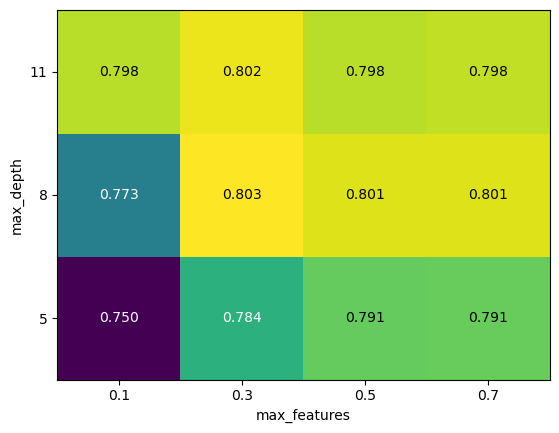

In [23]:
#plot the grid search to see if hte parameters are optimized by ensuring a local maximum.  If there is a local maximum that doesn't have borders then we are more
#confident that we selected the correct range
plot_grid_search_results(grid_search)

In [24]:
#set up the best parameters to get predictions for the Kaggle competition
best_max_depth = grid_search.best_params_['max_depth']
best_max_features = grid_search.best_params_['max_features']

best_model_rf = RandomForestClassifier(random_state=55, n_estimators=300, max_depth=best_max_depth, max_features= best_max_features)

best_model_rf.fit(X_train,y_train)

testmModel(best_model_rf,"RandomForest_NanReplaced")

### LogisticRegression

Trying to perform gridsearch on Logistic Regression

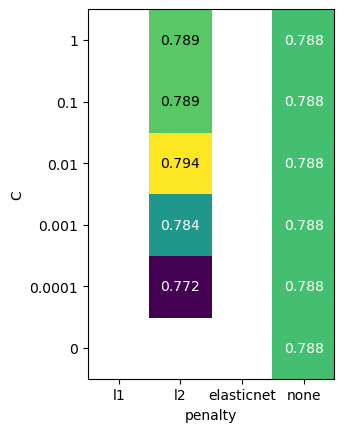

In [25]:
from sklearn.linear_model import LogisticRegression


param_grid = {'C': [0, 0.0001 ,0.001, 0.01, 0.1, 1], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none']}


grid_search_lr = GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=7,scoring='f1_weighted',return_train_score=True)
grid_search_lr.fit(X_train,y_train)

best_C = grid_search_lr.best_params_['C']
best_penalty = grid_search_lr.best_params_['penalty']

best_model_lr = LogisticRegression(C=best_C, penalty= best_penalty)
best_model_lr.fit(X_train,y_train)

plot_grid_search_results(grid_search_lr)

In [26]:
#print best results
print_grid_search_result(grid_search_lr)

Best parameters: {'C': 0.01, 'penalty': 'l2'}
Best score: 0.7943974546651028


In [27]:
#print the entire grid search just to see how different the scoring is when changing parameters
results = grid_search_lr.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("F1 score:", mean_score, "with parameters:", params)

F1 score: nan with parameters: {'C': 0, 'penalty': 'l1'}
F1 score: nan with parameters: {'C': 0, 'penalty': 'l2'}
F1 score: nan with parameters: {'C': 0, 'penalty': 'elasticnet'}
F1 score: 0.7878435101470246 with parameters: {'C': 0, 'penalty': 'none'}
F1 score: nan with parameters: {'C': 0.0001, 'penalty': 'l1'}
F1 score: 0.772391158775025 with parameters: {'C': 0.0001, 'penalty': 'l2'}
F1 score: nan with parameters: {'C': 0.0001, 'penalty': 'elasticnet'}
F1 score: 0.7878435101470246 with parameters: {'C': 0.0001, 'penalty': 'none'}
F1 score: nan with parameters: {'C': 0.001, 'penalty': 'l1'}
F1 score: 0.7840398518724483 with parameters: {'C': 0.001, 'penalty': 'l2'}
F1 score: nan with parameters: {'C': 0.001, 'penalty': 'elasticnet'}
F1 score: 0.7878435101470246 with parameters: {'C': 0.001, 'penalty': 'none'}
F1 score: nan with parameters: {'C': 0.01, 'penalty': 'l1'}
F1 score: 0.7943974546651028 with parameters: {'C': 0.01, 'penalty': 'l2'}
F1 score: nan with parameters: {'C': 0.01

It appears that neither the elasticnet or L1 didn't work because they could not fit the model.  This was somewhat expected given the warning from above.  Based on what I've read online if the solver cannot converge then this happens.  I tried different solvers such as "saga" and "liblinear" but neither of those worked as well.

In [28]:
testmModel(best_model_lr,"LogisticRegression_NanReplaced")

### SVC - this model takes roughly 10 minutes to run.  I also ran this multiple times to find the optimal param_grid hence why the numbers are somewhat odd.  Initially I started with (0.1, 1, 10).  I also didn't vary Gamma at all and used the default "scale" because the cell ran for over 40 minutes with no result if specific gamma values are used

In [29]:
from sklearn.svm import SVC

param_grid = {'C': [1,50,100], 'kernel': ['poly', 'rbf']}


grid_search_SVC = GridSearchCV(SVC(),param_grid=param_grid,cv=7,scoring='f1_weighted',return_train_score=True)
grid_search_SVC.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [1, 50, 100], 'kernel': ['poly', 'rbf']},
             return_train_score=True, scoring='f1_weighted')

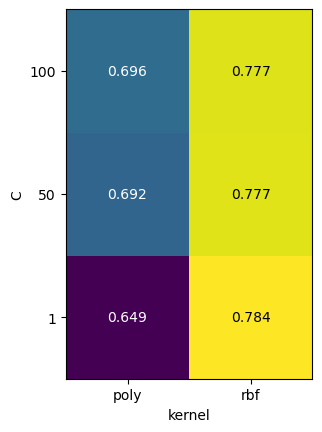

In [30]:
best_C = grid_search_SVC.best_params_['C']
best_kernel = grid_search_SVC.best_params_['kernel']

best_model_SVM = SVC(C=best_C, kernel= best_kernel)
best_model_SVM.fit(X_train,y_train)

plot_grid_search_results(grid_search_SVC)

In [31]:
#print best results
print_grid_search_result(grid_search_SVC)

Best parameters: {'C': 1, 'kernel': 'rbf'}
Best score: 0.7835597760989433


In [32]:
testmModel(best_model_SVM,"SVM_NanReplaced")

### GradientBoostingClassifier

Perform gridsearch on GBC.  Most results below are roughly the same with the best result coming from parameters that are "middle of the pack" ('learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50) so we can assume it's a local maximum

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [10,50, 100, 150],
    'max_depth': [2, 3, 5, 7],
    'learning_rate': [0.01, 0.1, 1.0]
}


grid_search_GBC = GridSearchCV(GradientBoostingClassifier(),param_grid=param_grid,cv=7,scoring='f1_weighted',return_train_score=True)
grid_search_GBC.fit(X_train,y_train)


best_n_estimators = grid_search_GBC.best_params_['n_estimators']
best_max_depth = grid_search_GBC.best_params_['max_depth']
best_learning_rate = grid_search_GBC.best_params_['learning_rate']


best_model_GBC = GradientBoostingClassifier(n_estimators=best_n_estimators, max_depth= best_max_depth, learning_rate=best_learning_rate )

best_model_GBC.fit(X_train,y_train)

#print the entire grid search just to see how different the scoring is when changing parameters
results = grid_search_GBC.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("F1 score:", mean_score, "with parameters:", params)


F1 score: 0.7215395064269586 with parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}
F1 score: 0.7117879627389936 with parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
F1 score: 0.7146024818532543 with parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
F1 score: 0.7524057478819033 with parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 150}
F1 score: 0.7372923836643188 with parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}
F1 score: 0.7560047503022862 with parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
F1 score: 0.7600972885464555 with parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
F1 score: 0.7777511153300322 with parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
F1 score: 0.7731432144942791 with parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 10}
F1 score: 0.7825745306147883 with paramete

In [34]:
#print best results
print_grid_search_result(grid_search_GBC)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.8068274939625703


In [35]:
testmModel(best_model_GBC,"GBC_NanReplaced")

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [9, 15, 35, 50],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=7,scoring='f1_weighted',return_train_score=True)
grid_search.fit(X_train,y_train)

#print best results
print_grid_search_result(grid_search)

#set up the best parameters to get predictions for the Kaggle competition
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
best_p = grid_search.best_params_['p']

best_model_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights,p=best_p, )

best_model_knn.fit(X_train,y_train)

testmModel(best_model_knn,"KNN_NanReplaced")

Best parameters: {'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}
Best score: 0.7798215497604533
